9.3.1 Writing to a text file: introducing the with statement

In [1]:
with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')

With acquires a resource, assignes its corresponding object to a variable (accounts in this example)

The built-in open function opens the file accounts.txt and associates it with a file object. 

The mode argument specifices the file-open mode specifying whether to open for reading, writing or both. The w indicates writing, creating the file if it doesn't exist. If no path is specified, python creates it in the current folder. Opening a file for writing delets all the existing data in the file. 

In the with statement's suite, the variable accounts is used to interact with the file. write is called 5 times to write five records to the accounts file each as a separate line of text ending in a new line. At the end of the with statement's suite, the with statement implicitly calls the file object's close method to close the file.

In [2]:
with open('grades.txt', mode='w') as grades:
    grades.write('1 Red A\n')
    grades.write('2 Green B\n')
    grades.write('3 White A\n')

9.3.2 reading data from a text file

In [3]:
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


In [4]:
with open('grades.txt', mode='r') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grade"}')
    for record in grades:
        student_id, name, grade = record.split()
        print(f'{student_id:<4}{name:<7}{grade}')

ID  Name   Grade
1   Red    A
2   Green  B
3   White  A


9.4 updating text files

In [5]:
# updating accounts.txt

accounts = open('accounts.txt', 'r')

In [6]:
temp_file = open('temp_file.txt', 'w')

In [7]:
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account!= '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')

In [8]:
import os

In [9]:
os.remove('accounts.txt')

In [10]:
os.rename('temp_file.txt', 'accounts.txt')

In [11]:
accounts = open('accounts.txt', 'r')

In [12]:
temp_file = open('temp_file.txt', 'w')

In [13]:
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if name != 'Doe':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Smith', balance])
            temp_file.write(new_record + '\n')

In [14]:
os.remove('accounts.txt')

In [15]:
os.rename('temp_file.txt', 'accounts.txt')

In [16]:
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Smith         345.67
300       Williams        0.00
400       Stone         -42.16
500       Rich          224.62


9.5 Serialization with JSON

In [17]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Leach', 'balance': 345.67}]}

In [18]:
#searializing an object to json
import json

In [19]:
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [20]:
#deserializaing the json text
with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)

In [21]:
accounts_json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Leach', 'balance': 345.67}]}

In [22]:
accounts_json['accounts']

[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Leach', 'balance': 345.67}]

In [23]:
accounts_json['accounts'][0]

{'account': 100, 'name': 'Jones', 'balance': 24.98}

In [24]:
accounts_json['accounts'][1]

{'account': 200, 'name': 'Leach', 'balance': 345.67}

In [25]:
# displaying the JSON text: dumps returns a python string representation of an object in JSON format
with open('accounts.json', 'r') as accounts: 
    print(json.dumps(json.load(accounts), indent=4))

{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Leach",
            "balance": 345.67
        }
    ]
}


In [26]:
grades_dict = {'gradebook':
               [{'student_id': 1, 'name': 'Kim', 'grade': 'A'},
                {'student_id': 2, 'name': 'Leach', 'grade': 'B'},
                {'student_id': 3, 'name': 'KimLeach', 'grade': 'A'}]}

In [27]:
with open('grades.json', 'w') as grades:
    json.dump(grades_dict, grades)

In [28]:
with open('grades.json', 'r') as grades:
    print(json.dumps(json.load(grades), indent=4))

{
    "gradebook": [
        {
            "student_id": 1,
            "name": "Kim",
            "grade": "A"
        },
        {
            "student_id": 2,
            "name": "Leach",
            "grade": "B"
        },
        {
            "student_id": 3,
            "name": "KimLeach",
            "grade": "A"
        }
    ]
}


9.6 pickle serialization and deserialization: pickle module can serioualize objects into a python-specific data format
    * pickle file can be hacked
    * cannot be used to communicate with apps written in other programming languages, only Python
    * not recommended for use, but may be encountered in legacy code

9.7 additional notes regarding files
    * 'r' = open a text file for reading. Default if a fil-open mode is not specified
    * 'w' = open a text file for writing. Existing file contents are deleted.
    * 'a' = open a text file for appending at the end, creating the file if it does not exist. New data is written at the end of the file. 
    * 'r+' = open a text file for reading and writing.
    * 'w+' = open a text file for reading and writing. Existing file contents are deleted.
    * 'a+' = open a text file reading and appending at the end. New data is written at the end of the file. If the file does not exist, it is created.
    
Other file object methods
    * the read method returns a string containing the number of characters specified by the method's integer argument
    * the readline mehtod returns one line of text as a string, including the newline character if there is one. This method returns an ampty string when it encounters the end of the file. 
    * the writelines method receives a list of strings and writes its contents to a file.

9.8 Handling exceptions: various types of exceptions can occur when you work with files.

9.8.1 division by zero and invalid input

In [29]:
#division by zero
10 / 0

ZeroDivisionError: division by zero

In [30]:
#invalid input
value = int(input('Enter an integer: '))

Enter an integer:  hello


ValueError: invalid literal for int() with base 10: 'hello'

9.8.2 try statements

In [31]:
# dividebyzero.py
"""Simple exception handling example."""

while True:
    # attempt to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError: # tried to convert non-numeric value to int
        print('You must enter two integers\n')
    except ZeroDivisionError: # denominator was 0
        print('Attempted to divide by zero\n')
    else: # executes only if no exceptions occur
        print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
        break # terminate the loop

Enter numerator:  100
Enter denominator:  0


Attempted to divide by zero



Enter numerator:  100
Enter denominator:  kim


You must enter two integers



Enter numerator:  100
Enter denominator:  7


100.000 / 7.000 = 14.286


try clause begins with keyword try, followed by a (:) and a sutie of statements that might raise exceptions

except clauses specify the type of exception it handles. In this case, each exception handler just displays a message indicating the problem that occurred

else clauses specify code that should execute only if the code in the try suite did not raise exceptions

the point in the program at whch an exception occurs is referred to as the raise point

In [39]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f' {value} could not be converted to an integer')
    else:
        print(f' int({value}) is {x}')

In [36]:
try_it(10.7)

 int(10.7) is 10


In [40]:
try_it('KimLeach')

 KimLeach could not be converted to an integer


9.8.3 Catching multiple exceptions in one except clause: if several except suites are identical, you can catch those exception types bu specifying them as a tuple in a single except handler, as in:
    except (type1, type2, ...) as variable_name: (the as clause is optional)
    
9.8.4 what exceptions does a function or method raise? exceptions may surface via statements in a try suite, via functions or methods called directly or indirectly from a try suite, or via the python interpreter as it executes the code. 

9.8.5 what code should be placed in a try suite? place in a try suite a logical section of a program in which several statements can raise exceptions, rather than wrapping a separate try statement around every statement that raises an exception. However, for proper exception-handling granularity, each try statement should enclose a section of code small enoough that the specific context is known and the except handlers can process the exception properly. If many statements in a try suite raise the same exception types, mulitple try statements may be required to determine each exception's context. 

9.9 finally clause: the finally clause is guaranteed to execute, regardless of whether its try suite executes successfully or an exception occurs

In [42]:
try:
    print('try suite with no exceptions raised')
except:
    print('this will not execute')
else:
    print('else executes because no exceptions in the try suite')
finally:
    print('finally always executes')

try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


In [43]:
try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else:
    print('else will not execute because an exception occurred')
finally:
    print('finally always executes')

try suite that raises an exception
a ValueError occurred
finally always executes


In [44]:
open('gradez.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'gradez.txt'

In [45]:
try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}')
except FileNotFoundError:
    print('The file name you specified does not exist')

The file name you specified does not exist


In [47]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')
    finally:
        print('finally executed')

In [48]:
try_it(10.7)

int(10.7) is 10
finally executed


In [49]:
try_it('KimLeach')

KimLeach could not be converted to an integer
finally executed


9.10 explicilty raising an exception: raise statement is raise ExceptionClassName and creates an object of the specified exception class.

In [ ]:
9.11 optional stack unwinding and tracebacks

In [50]:
def function1():
    function2()

In [51]:
def function2():
    raise Exception('An exception occurred')

In [52]:
function1()

Exception: An exception occurred

9.12 Intro to Data Science: Working with CSV files

In [53]:
#writing to a CSV file

import csv

In [55]:
with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Kim', 345.67])
    writer.writerow([300, 'Leach', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])

In [56]:
#reading form a csv file

with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Kim           345.67
300       Leach            0.0
400       Stone         -42.16
500       Rich          224.62


In [57]:
with open('grades.csv', mode='w', newline='') as grades:
    writer = csv.writer(grades)
    writer.writerow([1, 'Kim', 'A'])
    writer.writerow([2, 'Leach', 'B'])
    writer.writerow([3, 'Valerie', 'A'])

In [59]:
with open('grades.csv', 'r', newline='') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grade"}')
    reader = csv.reader(grades)
    for record in reader:
        student_id, name, grade = record
        print(f'{student_id:<4}{name:<10}{grade}')

ID  Name   Grade
1   Kim       A
2   Leach     B
3   Valerie   A


In [60]:
#working with locally stored csv files

import pandas as pd

In [61]:
df = pd.read_csv('accounts.csv',
                 names=['account', 'name', 'balance'])

In [62]:
df

,account,name,balance
0,100,Jones,24.98
1,200,Kim,345.67
2,300,Leach,0.00
3,400,Stone,-42.16
4,500,Rich,224.62


In [63]:
#to save a dataframe to a file using CSV format, call dataframe method to_csv
df.to_csv('accounts_from_dataframe.csv', index=False)

9.12.3 reading the Titanic disaster dataset

In [64]:
#Kim Leach
titanic = pd.read_csv('https://vincentarelbundock.github.io/' +
                      'Rdatasets/csv/carData/TitanicSurvival.csv')

In [65]:
titanic

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd


In [68]:
pd.set_option('display.precision', 2)# format for floating-point values

In [69]:
titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [70]:
titanic.tail()

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [71]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

In [72]:
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [74]:
titanic.describe() #kim leach

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [76]:
(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

Count is the total number of items in teh result
Unique is the number of unique values (2) in the result: True (survived) and False(died)
Top is the most frequently occurring value in the result
Freq is the number of occurrences of the top value

9.12.5 Passenger age histogram Kim Leach

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

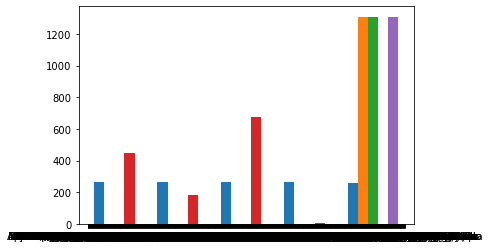

In [97]:
plt.hist(titanic, 5)
plt.show()

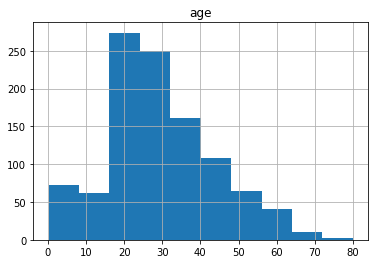

In [100]:
histogram = titanic.hist() #kim leach

In [99]:
pd.read_csv('grades.csv', names=['ID', 'Name', 'Grade'])

,ID,Name,Grade
0,1,Kim,A
1,2,Leach,B
2,3,Valerie,A
